In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import plotly.express as px

plt.style.use('ggplot')

In [24]:
#Read the master data
df = pd.read_csv("master_data.csv")

### Step 1: Data Understanding

* Dataframe shape
* head and tail
* dtypes
* describe

In [25]:
df.shape

(87, 10)

In [26]:
df.head()

,Name,Email,Age,Country,Education Level,Number of Languages Spoken,Gender,Satisfaction Rate,Marital Status,Number of Children
0,Landon Patel,landonpatel@gmail.com,32,United States,Bachelor's Degree,2,Male,8,Single,3
1,Cassidy Turner,cassidyturner@yahoo.com,24,Canada,Master's Degree,1,Non-binary,9,Married,4
2,Axl Thompson,axl.thompson@hotmail.com,43,United States,High School,3,Male,7,Single,1
3,Ivy Wilson,ivywilson@gmail.com,58,United Kingdom,Bachelor's Degree,4,Female,6,Divorced,0
4,Reece Scott,reece.scott@outlook.com,26,Australia,Doctorate,4,Male,4,Married,2


In [27]:
df.dtypes

Name                          object
Email                         object
Age                            int64
Country                       object
Education Level               object
Number of Languages Spoken     int64
Gender                        object
Satisfaction Rate              int64
Marital Status                object
Number of Children             int64
dtype: object

In [28]:
df.describe()

,Age,Number of Languages Spoken,Satisfaction Rate,Number of Children
count,87.000000,87.000000,87.000000,87.000000
mean,40.195402,2.310345,5.781609,1.862069
std,13.479389,1.164498,2.656389,1.431964
min,20.000000,1.000000,1.000000,0.000000
25%,28.500000,1.000000,4.000000,1.000000
50%,40.000000,2.000000,6.000000,2.000000
75%,51.500000,3.000000,8.000000,3.000000
max,61.000000,4.000000,10.000000,4.000000


### Step 2: Feature Understanding
(Univariate analysis)

Plotting Feature Distributions
* Histogram
* KDE
* Boxplot

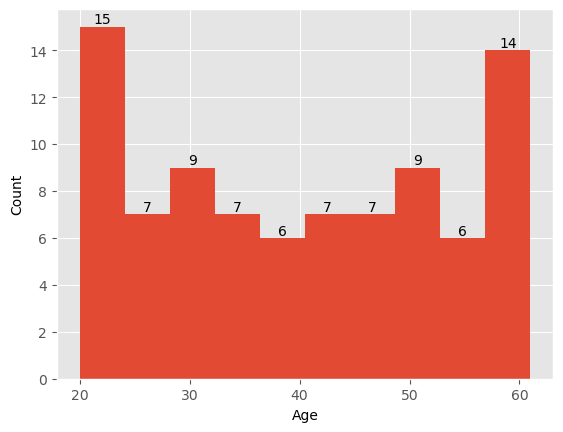

In [29]:
# Visualize the distribution of numerical column Age
fig, ax = plt.subplots()

# a histogram returns 3 objects : n (i.e. frequncies), bins, patches
freq, bins, patches = ax.hist(df['Age'])
ax.set_xlabel('Age')
ax.set_ylabel('Count')

# x coordinate for labels
bin_centers = np.diff(bins)*0.5 + bins[:-1]

for n, (fr, x, patch) in enumerate(zip(freq, bin_centers, patches)):
    height = int(freq[n])
    plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )

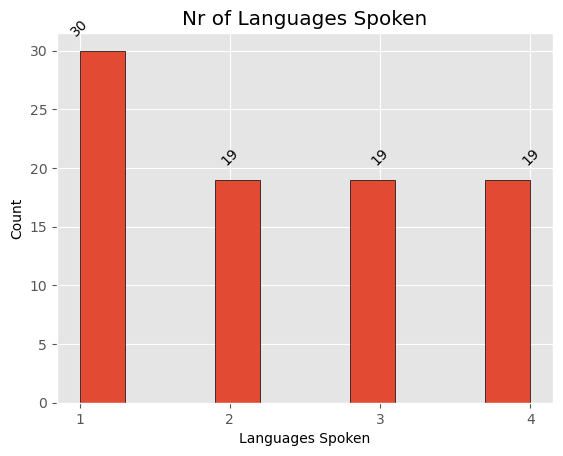

In [30]:
#Plot Histagram for numerical column Number of Languages Spoken
plt.hist(df['Number of Languages Spoken'],bins=10, edgecolor='black', color= (0.8862745098039215, 0.2901960784313726, 0.2), alpha=1)

#Set label and Title
plt.xlabel('Languages Spoken')
plt.ylabel('Count')
plt.title('Nr of Languages Spoken')
plt.xticks([1,2,3,4])
# Annotate columns
unique_values = np.nditer(df['Number of Languages Spoken'].unique())
for value in unique_values:
    count = len(df[df['Number of Languages Spoken'] == value])
    plt.annotate(str(count), xy=(value, count), xytext=(value, count+1), ha='center', va='bottom', rotation=45)

In [34]:
#Preper data for the pie-chart
satisfaction_rates = df['Satisfaction Rate']
satisfaction_counts = satisfaction_rates.value_counts().sort_index()

In [42]:
satisfaction_counts


1      6
2      6
3      8
4     10
5      9
6     10
7     10
8     12
9     10
10     6
Name: Satisfaction Rate, dtype: int64

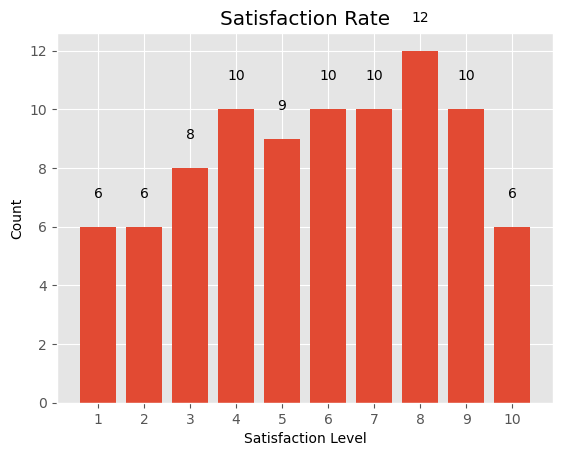

In [49]:

custom_color = (0.8862745098039215, 0.2901960784313726, 0.2)
# Create a bar graph of satisfaction_counts
satisfaction_counts = [6, 6, 8, 10, 9, 10, 10, 12, 10, 6]
plt.bar(range(1, 11), satisfaction_counts, color=custom_color)
plt.xticks(range(1, 11))
# Add count annotations above each bar
for x, y in zip(range(1, 11), satisfaction_counts):
    plt.annotate(str(y), xy=(x, y), xytext=(x, y+1), ha='center')

# Add title and axis labels
plt.title('Satisfaction Rate')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')

plt.show()

In [58]:
#Extract the data for the Nr of Children column
num_children = df['Number of Children']


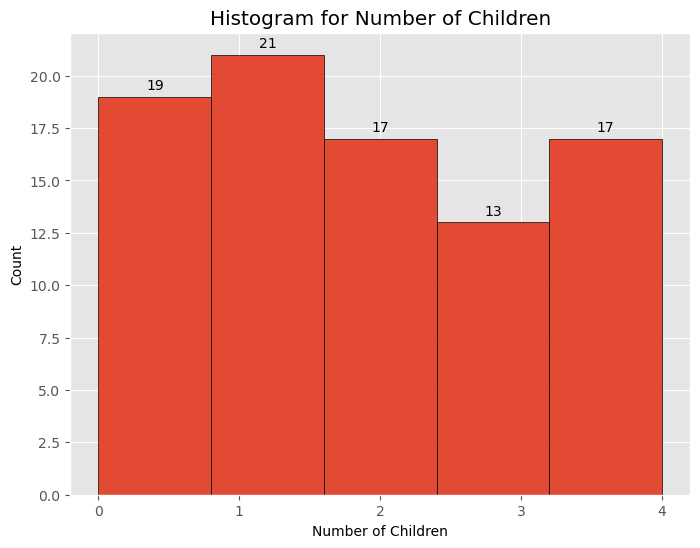

In [57]:
#Set up the histogram plot
fig, ax = plt.subplots(figsize = (8, 6))

#Plot the histogram
hist = plt.hist(num_children, bins=5, edgecolor='black', color=custom_color)

#Add Labels and Title
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Histogram for Number of Children')

# Add count information
for i in range(len(hist[0])):
    count = int(hist[0][i])
    x = hist[1][i] + (hist[1][i+1] - hist[1][i]) / 2
    y = hist[0][i]
    plt.annotate(str(count), xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center')

# Modify x-axis ticks and labels
plt.xticks(range(min(num_children), max(num_children) + 1, 1))

plt.show()

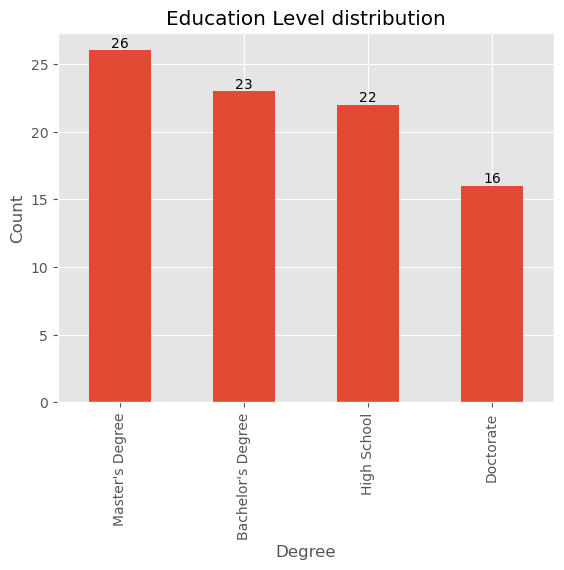

In [36]:
# Visualize the distribution of categorical variables
ax = df['Education Level'].value_counts().plot(kind='bar', title='Education Level distribution')
ax.set_xlabel('Degree')
ax.set_ylabel('Count')

# Annotate columns
for i, count in enumerate(df['Education Level'].value_counts()):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

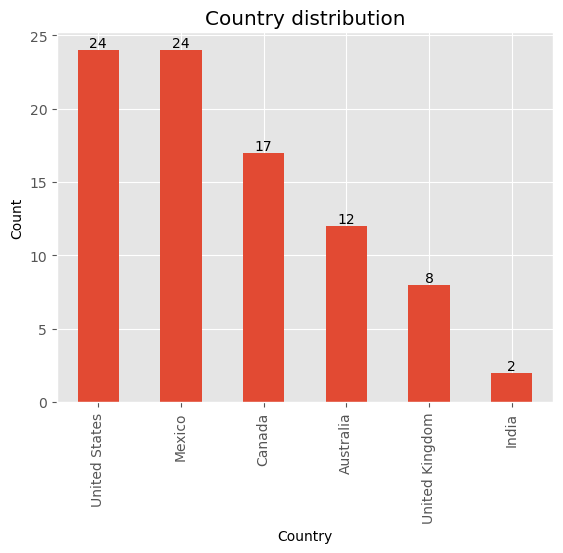

In [59]:
# Visualize the distribution of categorical column "Country"
ax = df['Country'].value_counts().plot(kind='bar', title='Country distribution')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

# Annotate columns
for i, count in enumerate(df['Country'].value_counts()):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

In [60]:
#Extract the data for the categorical column Gender
gender_counts = df['Gender'].value_counts()

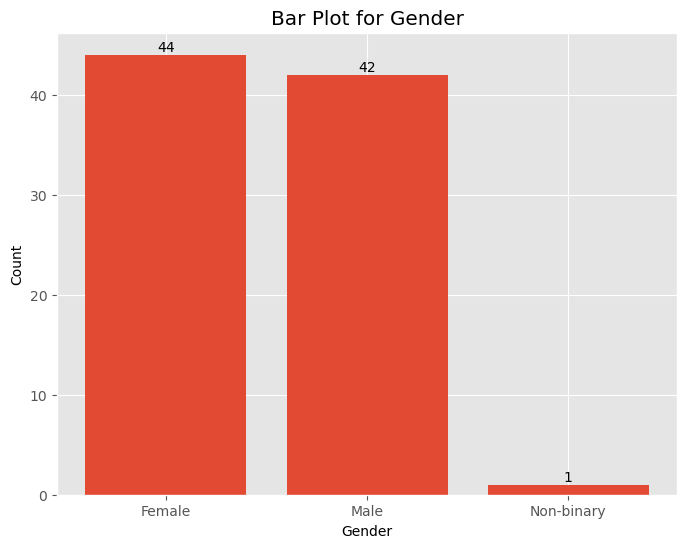

In [61]:
#Set up the bar plot
fig, ax = plt.subplots(figsize=(8, 6))

#Plot the bar plot
bars = plt.bar(gender_counts.index, gender_counts.values, color=custom_color)

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Plot for Gender')

# Show the plot
plt.show()

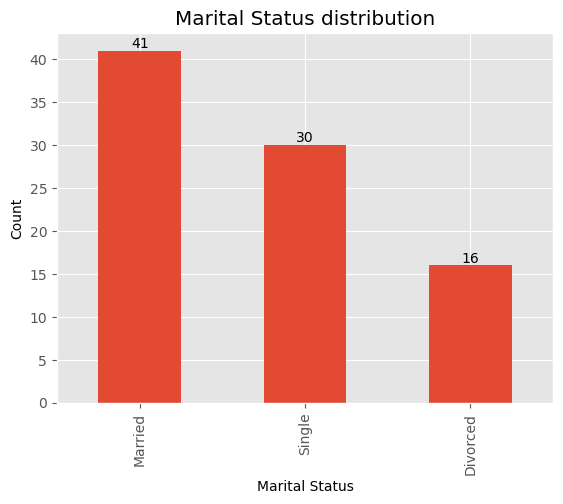

In [62]:
# Visualize the distribution of categorical column "Country"
ax = df['Marital Status'].value_counts().plot(kind='bar', title='Marital Status distribution')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')

# Annotate columns
for i, count in enumerate(df['Marital Status'].value_counts()):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

### Step 3: Feature Relationships

(Multivariate analysis)

Plotting Feature Distributions

* Histogram
* Line graph
* Scatter Plot
* Pie-Chart

Text(0, 0.5, 'Average Satisfaction Rate')

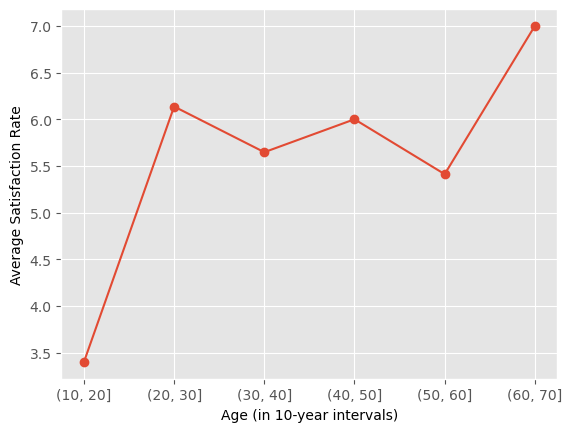

In [63]:
# Group the DataFrame by age in intervals of 5 years, and calculate the mean of Satisfaction Rate for each group
df_age = df.groupby(pd.cut(df['Age'], range(0, 101, 10)))['Satisfaction Rate'].mean()

# Plot the results
fig, ax = plt.subplots()
ax.plot(df_age.index.astype(str), df_age.values, '-o')

ax.set_xlabel('Age (in 10-year intervals)')
ax.set_ylabel('Average Satisfaction Rate')

In [64]:
# Create a correlation matrix for numerical variables
correlation_matrix = df[['Age', 'Number of Languages Spoken', 'Satisfaction Rate', 'Number of Children']].corr()
correlation_matrix

,Age,Number of Languages Spoken,Satisfaction Rate,Number of Children
Age,1.000000,0.121285,0.069402,-0.084733
Number of Languages Spoken,0.121285,1.000000,-0.090605,-0.078629
Satisfaction Rate,0.069402,-0.090605,1.000000,-0.023295
Number of Children,-0.084733,-0.078629,-0.023295,1.000000


<Axes: xlabel='Age', ylabel='Satisfaction Rate'>

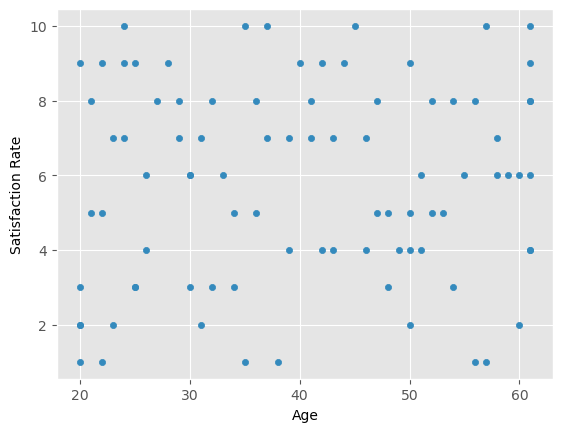

In [65]:
# Visualize the relationship between two numerical variables
df.plot.scatter(x='Age', y='Satisfaction Rate')

In [66]:
# Crosstabulation of two categorical variables
cross_tab = pd.crosstab(df['Gender'], df['Marital Status'])
cross_tab

Marital Status,Divorced,Married,Single
Gender,,,
Female,7,21,16
Male,9,19,14
Non-binary,0,1,0


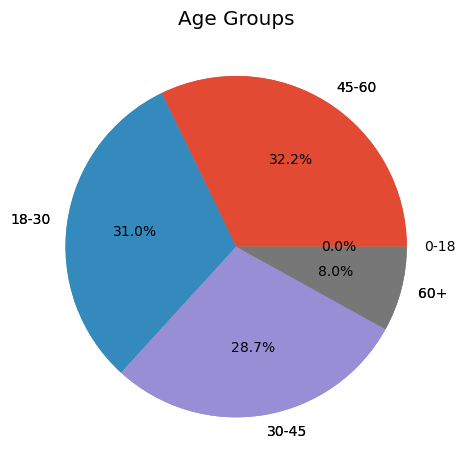

In [67]:
# Derive a new feature 'Age Group' from 'Age'
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, float('inf')], labels=['0-18', '18-30', '30-45', '45-60', '60+'])

# Create various visualizations to summarize findings
ax = df['Age Group'].value_counts().plot(kind='pie', title='Age Groups', )
ax.set_ylabel('')

# Plotting the pie chart
plt.pie(df['Age Group'].value_counts(), 
        labels=df['Age Group'].value_counts().index, autopct='%1.1f%%')

# Adding numbers on the pie chart
plt.gca().set_aspect('equal')  # Equal aspect ratio ensures a circular pie chart
plt.tight_layout()  # Adjusts the padding and spacing
plt.show()

Text(0.5, 1.0, 'Correlation Matrix of Winsorized DataFrame')

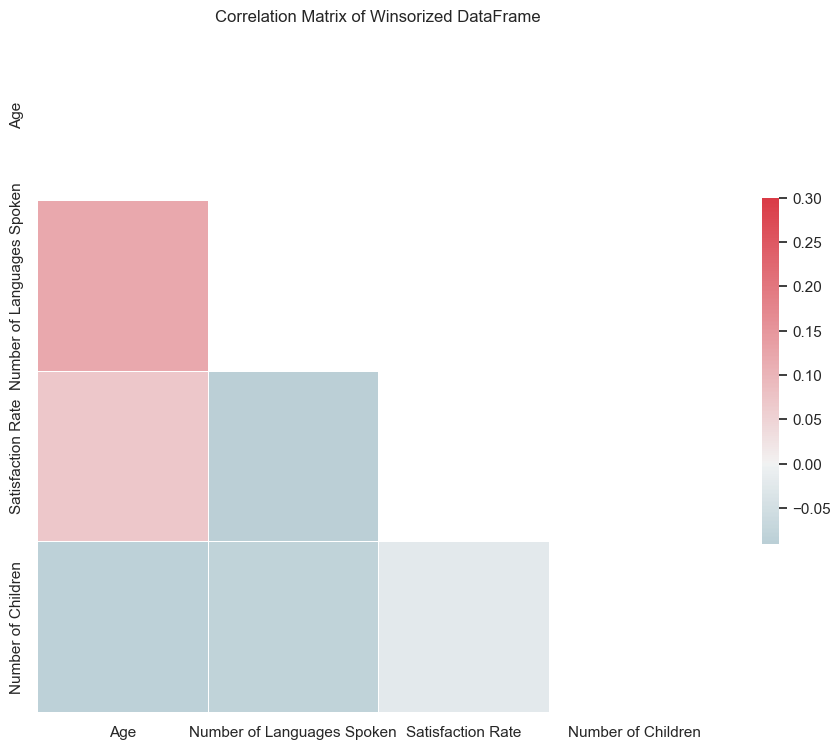

In [68]:
# Select numerical columns
numeric_columns = df.select_dtypes(include=[np.number])

# Create the correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the correlation matrix
sns.set(style="white")
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Winsorized DataFrame')

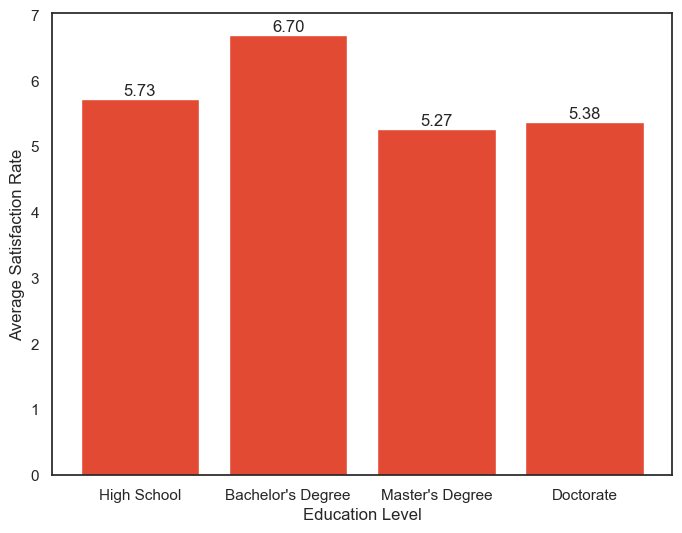

In [69]:
# Calculate the average Satisfaction Rate by Education Level
avg_satisfaction_by_education = df.groupby('Education Level')['Satisfaction Rate'].mean()

# Sort the Series by Education Level
avg_satisfaction_by_education = avg_satisfaction_by_education.reindex(['High School', "Bachelor's Degree", "Master's Degree", 'Doctorate'])

custom_color = (0.8862745098039215, 0.2901960784313726, 0.2)

# Create a larger bar plot of average Satisfaction Rate by Education Level with custom colors
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(avg_satisfaction_by_education.index, avg_satisfaction_by_education.values, color=custom_color)
ax.set_xlabel('Education Level')
ax.set_ylabel('Average Satisfaction Rate')

# Add numerical values on top of the bars
for i, v in enumerate(avg_satisfaction_by_education.values):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom')

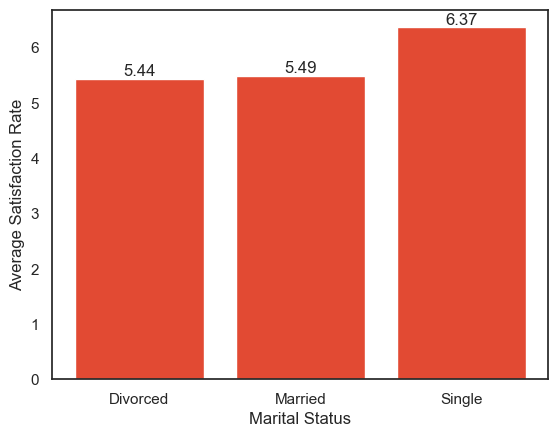

In [70]:
# Calculate the average Satisfaction Rate by Marital Status
avg_satisfaction_by_marital = df.groupby('Marital Status')['Satisfaction Rate'].mean()

# Create a bar plot of average Satisfaction Rate by Marital Status
fig, ax = plt.subplots()
ax.bar(avg_satisfaction_by_marital.index, avg_satisfaction_by_marital.values, color=custom_color)
ax.set_xlabel('Marital Status')
ax.set_ylabel('Average Satisfaction Rate')

# Add numerical values on top of the bars
for i, v in enumerate(avg_satisfaction_by_marital.values):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom')

**there is no enough data in gender type Non-binary to conclude an average satisfaction rate**

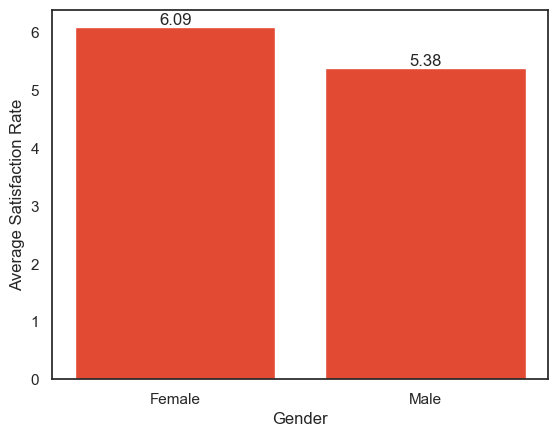

In [73]:
# Filter out Non-binary gender
df = df[df['Gender'] != 'Non-binary']

# Calculate the average Satisfaction Rate by Gender
avg_satisfaction_by_gender = df.groupby('Gender')['Satisfaction Rate'].mean()

# Create a bar plot of average Satisfaction Rate by Gender
fig, ax = plt.subplots()
ax.bar(avg_satisfaction_by_gender.index, avg_satisfaction_by_gender.values,color=custom_color)
ax.set_xlabel('Gender')
ax.set_ylabel('Average Satisfaction Rate')

# Add numerical values on top of the bars
for i, v in enumerate(avg_satisfaction_by_gender.values):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom')

<Axes: xlabel='Number of Languages Spoken', ylabel='Satisfaction Rate'>

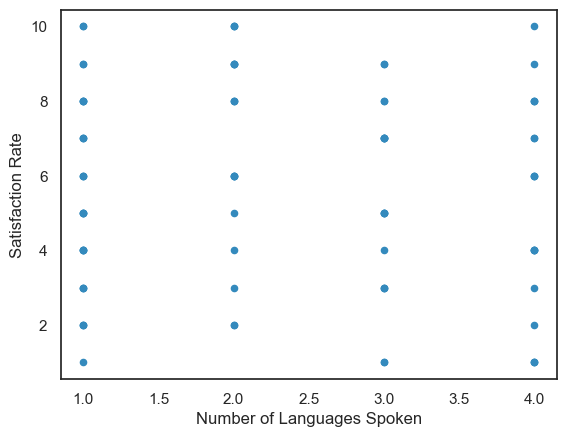

In [72]:
df.plot.scatter(x='Number of Languages Spoken', y='Satisfaction Rate')